In [110]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [71]:
#reading the csv file

data = pd.read_csv('trips_data.csv')
data.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency
0,197,UberGo,COMPLETED,2020-03-18 00:46:03 +0000 UTC,2020-03-18 00:51:07 +0000 UTC,28.448375,77.078924,"Sector 43 Service Rd, Block C, GH-11, Sector 4...",2020-03-18 01:11:28 +0000 UTC,28.554371,77.086326,"Terminal 3, Indira Gandhi International Airpor...",11.21,291.11,INR
1,197,UberGo,CANCELED,2020-03-18 00:40:56 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,28.452049,77.075093,"Rider House, Sector 44, Gurugram, Haryana 1220...",1970-01-01 00:00:00 +0000 UTC,28.452027,77.075096,"Terminal 3, Indira Gandhi International Airpor...",0.00,0.00,INR
2,197,UberGo,COMPLETED,2020-03-16 18:32:51 +0000 UTC,2020-03-16 18:35:14 +0000 UTC,28.564064,77.121944,Terminal 1 (T1),2020-03-16 19:00:28 +0000 UTC,28.448333,77.079055,"Sector 43 Service Rd, Block C, GH-11, Sector 4...",12.39,367.28,INR
3,130,UberAuto,CANCELED,2020-03-14 16:24:01 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"1253, D-BLOCK, AECS LAYOUT, Kundalahalli, Broo...",0.00,0.00,INR
4,130,UberAuto,COMPLETED,2020-02-23 13:15:58 +0000 UTC,2020-02-23 13:25:54 +0000 UTC,12.960438,77.712618,"House No. 1276, 6th Main, 6th Cross, D Block, ...",2020-02-23 13:55:48 +0000 UTC,12.983456,77.640496,"#3, 4th floor, Smart Square Complex, 100 Feet ...",7.07,131.57,INR


In [72]:
data.shape

(163, 15)

In [73]:
data.columns

Index(['City', 'Product Type', 'Trip or Order Status', 'Request Time',
       'Begin Trip Time', 'Begin Trip Lat', 'Begin Trip Lng',
       'Begin Trip Address', 'Dropoff Time', 'Dropoff Lat', 'Dropoff Lng',
       'Dropoff Address', 'Distance (miles)', 'Fare Amount', 'Fare Currency'],
      dtype='object')

In [74]:
#Check for missing values

data.isna().sum()

City                     0
Product Type            30
Trip or Order Status     0
Request Time             0
Begin Trip Time          0
Begin Trip Lat          67
Begin Trip Lng          67
Begin Trip Address      66
Dropoff Time             0
Dropoff Lat             67
Dropoff Lng             67
Dropoff Address          0
Distance (miles)         0
Fare Amount              0
Fare Currency            2
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 15 columns):
City                    163 non-null int64
Product Type            133 non-null object
Trip or Order Status    163 non-null object
Request Time            163 non-null object
Begin Trip Time         163 non-null object
Begin Trip Lat          96 non-null float64
Begin Trip Lng          96 non-null float64
Begin Trip Address      97 non-null object
Dropoff Time            163 non-null object
Dropoff Lat             96 non-null float64
Dropoff Lng             96 non-null float64
Dropoff Address         163 non-null object
Distance (miles)        163 non-null float64
Fare Amount             163 non-null float64
Fare Currency           161 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 19.2+ KB


In [76]:
#Rename columns for better understanding

data = data.rename(columns={'Product Type':'product_type','Trip or Order Status':'status','Request Time':'request_time','Begin Trip Time':'trip_time','Begin Trip Lat':'trip_lat',
'Begin Trip Lng':'trip_lng','Begin Trip Address':'trip_address','Dropoff Time':'drop_time','Dropoff Lat':'drop_lat','Dropoff Lng':'drop_lng','Dropoff Address':'drop_address','Distance (miles)':'distance_miles','Fare Amount':'fare_amount'})

In [77]:
data.head()

,City,product_type,status,request_time,trip_time,trip_lat,trip_lng,trip_address,drop_time,drop_lat,drop_lng,drop_address,distance_miles,fare_amount,Fare Currency
0,197,UberGo,COMPLETED,2020-03-18 00:46:03 +0000 UTC,2020-03-18 00:51:07 +0000 UTC,28.448375,77.078924,"Sector 43 Service Rd, Block C, GH-11, Sector 4...",2020-03-18 01:11:28 +0000 UTC,28.554371,77.086326,"Terminal 3, Indira Gandhi International Airpor...",11.21,291.11,INR
1,197,UberGo,CANCELED,2020-03-18 00:40:56 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,28.452049,77.075093,"Rider House, Sector 44, Gurugram, Haryana 1220...",1970-01-01 00:00:00 +0000 UTC,28.452027,77.075096,"Terminal 3, Indira Gandhi International Airpor...",0.00,0.00,INR
2,197,UberGo,COMPLETED,2020-03-16 18:32:51 +0000 UTC,2020-03-16 18:35:14 +0000 UTC,28.564064,77.121944,Terminal 1 (T1),2020-03-16 19:00:28 +0000 UTC,28.448333,77.079055,"Sector 43 Service Rd, Block C, GH-11, Sector 4...",12.39,367.28,INR
3,130,UberAuto,CANCELED,2020-03-14 16:24:01 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"1253, D-BLOCK, AECS LAYOUT, Kundalahalli, Broo...",0.00,0.00,INR
4,130,UberAuto,COMPLETED,2020-02-23 13:15:58 +0000 UTC,2020-02-23 13:25:54 +0000 UTC,12.960438,77.712618,"House No. 1276, 6th Main, 6th Cross, D Block, ...",2020-02-23 13:55:48 +0000 UTC,12.983456,77.640496,"#3, 4th floor, Smart Square Complex, 100 Feet ...",7.07,131.57,INR


In [78]:
data.describe()

,City,trip_lat,trip_lng,drop_lat,drop_lng,distance_miles,fare_amount
count,163.000000,96.000000,96.000000,96.000000,96.000000,163.000000,163.000000
mean,199.165644,19.093549,77.575189,19.083779,77.577838,3.206135,100.391166
std,129.285036,7.477411,0.565934,7.482483,0.575853,6.187678,208.938052
min,130.000000,12.281667,76.642963,12.281633,76.642980,0.000000,0.000000
25%,130.000000,12.966817,77.077966,12.960508,77.078065,0.000000,0.000000
50%,130.000000,17.238296,77.695040,17.236829,77.706988,0.000000,0.000000
75%,203.000000,28.605261,77.726888,28.569936,77.730492,2.955000,90.550000
max,769.000000,30.752430,78.475809,30.738788,78.651437,28.970000,1192.330000


# Data Preprocessing

In [79]:
#Checking various product types

data['product_type'].value_counts()

UberAuto                46
UberGo                  26
uberGO                  14
Premier                 14
UberGO                   9
UberEATS Marketplace     5
GO                       4
Pool                     4
Pool: MATCHED            3
GO Hatchback             2
POOL: MATCHED            1
UberXL                   1
POOL                     1
uberX                    1
Airport Pool             1
uberPOOL: MATCHED        1
Name: product_type, dtype: int64

In [80]:
#Combining same type of products

data['product_type'] = data['product_type'].replace(['uberGO','UberGO','GO','GO Hatchback','uberX','UberXL','Pool: MATCHED','POOL: MATCHED','POOL','Airport Pool','uberPOOL: MATCHED'],['UberGo','UberGo','UberGo','UberGo','Premier','Premier','Pool','Pool','Pool','Pool','Pool'])

In [81]:
#Skipping uber eats product type

data = data[data.product_type!='UberEATS Marketplace']

In [82]:
data['product_type'].value_counts()

UberGo      55
UberAuto    46
Premier     16
Pool        11
Name: product_type, dtype: int64

In [83]:
#Visualising Data

df = data[data.product_type!='UberEATS Marketplace'][['distance_miles','fare_amount']]
df.describe().transpose().round(1)

,count,mean,std,min,25%,50%,75%,max
distance_miles,158.0,3.3,6.3,0.0,0.0,0.0,3.0,29.0
fare_amount,158.0,99.0,211.4,0.0,0.0,0.0,87.8,1192.3


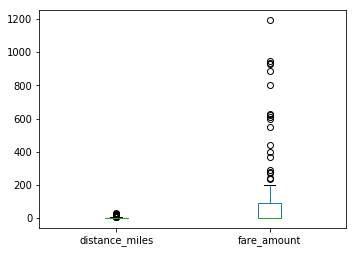

In [84]:
plt.figure(figsize=(5.5,4))
df.boxplot(grid = False)
plt.show()

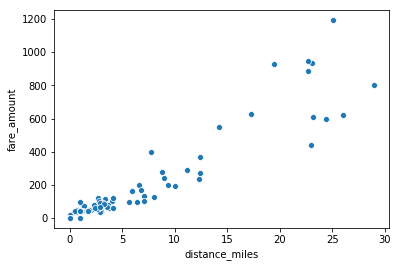

In [85]:
sns.scatterplot(x='distance_miles',y='fare_amount',data=df)

In [86]:
#Removing currency column since data isonly for India

data.pop('Fare Currency')

0      INR
1      INR
2      INR
3      INR
4      INR
5      INR
6      INR
7      INR
8      INR
9      INR
10     INR
11     INR
12     INR
13     INR
14     INR
15     INR
16     INR
17     INR
18     INR
19     INR
20     INR
21     INR
22     INR
23     INR
24     INR
25     INR
26     INR
27     INR
28     INR
29     INR
      ... 
132    INR
133    INR
135    INR
136    INR
137    INR
138    INR
139    INR
140    INR
141    INR
142    INR
143    INR
144    INR
145    INR
146    INR
147    INR
148    INR
149    INR
150    INR
151    INR
152    INR
153    INR
154    INR
155    INR
156    INR
157    INR
158    INR
159    INR
160    INR
161    INR
162    INR
Name: Fare Currency, Length: 158, dtype: object

In [87]:
data.isnull().sum().sort_values()

City               0
status             0
request_time       0
trip_time          0
drop_time          0
drop_address       0
distance_miles     0
fare_amount        0
product_type      30
trip_address      66
trip_lat          67
trip_lng          67
drop_lat          67
drop_lng          67
dtype: int64

In [88]:
data[data.product_type.isnull()]

,City,product_type,status,request_time,trip_time,trip_lat,trip_lng,trip_address,drop_time,drop_lat,drop_lng,drop_address,distance_miles,fare_amount
7,130,NaN,UNFULFILLED,2020-02-01 11:06:41 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"77 & 78, MG Road, next to Deccan Herald Office...",0.0,0.0
15,203,NaN,UNFULFILLED,2020-01-02 14:18:15 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"Lanco Overpass, Sai Vaibhav Layout, Sai Aishwa...",0.0,0.0
38,130,NaN,UNFULFILLED,2019-11-15 13:54:01 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"Brookefields Store No.593, AECS Layout - C Blo...",0.0,0.0
44,130,NaN,UNFULFILLED,2019-10-25 03:47:16 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"EPIP Zone, Whitefield, Bengaluru, Karnataka 56...",0.0,0.0
48,130,NaN,UNFULFILLED,2019-10-21 12:50:50 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"1253, D-BLOCK, AECS LAYOUT, Kundalahalli, Broo...",0.0,0.0
52,130,NaN,UNFULFILLED,2019-10-21 04:28:10 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"EPIP Zone, Whitefield, Bengaluru, Karnataka 56...",0.0,0.0
64,130,NaN,UNFULFILLED,2019-10-09 04:35:42 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"9, EPIP Zone Whitefield Rd, Phase 2, Brookefie...",0.0,0.0
65,130,NaN,UNFULFILLED,2019-10-09 04:32:19 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"9, EPIP Zone Whitefield Rd, Phase 2, Brookefie...",0.0,0.0
68,130,NaN,UNFULFILLED,2019-10-08 00:43:11 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"1253, D-BLOCK, AECS LAYOUT, Kundalahalli, Broo...",0.0,0.0
69,130,NaN,UNFULFILLED,2019-10-08 00:38:03 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"1253, D-BLOCK, AECS LAYOUT, Kundalahalli, Broo...",0.0,0.0


In [89]:
#Dropping nan values for product type

data.dropna(subset=['product_type'],inplace=True)

In [90]:
data.isnull().sum().sort_values()

City               0
product_type       0
status             0
request_time       0
trip_time          0
drop_time          0
drop_address       0
distance_miles     0
fare_amount        0
trip_address      36
trip_lat          37
trip_lng          37
drop_lat          37
drop_lng          37
dtype: int64

In [91]:
#Checking the count for status

data['status'].value_counts()

COMPLETED          74
CANCELED           51
DRIVER_CANCELED     3
Name: status, dtype: int64

In [92]:
data.shape

(128, 14)

In [101]:
#Calculating distance in km

data['distance_km'] = round(data.distance_miles*1.60934,2)

In [114]:
#Calculating amount per km

data['amount_km'] = round(data.fare_amount/data.distance_km,2)
#data['amount_km']

In [111]:
#Converting object type to datetime for columns involving datetime

def dateConversion(df,cols):
    for col in cols:
        df[col] = df[col].apply(lambda x : x.replace(' +0000 UTC',''))
        df[col] = pd.to_datetime(df[col])
    return df
data = dateConversion(data,['request_time','trip_time','drop_time'])

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 162
Data columns (total 16 columns):
City              128 non-null int64
product_type      128 non-null object
status            128 non-null object
request_time      128 non-null datetime64[ns]
trip_time         128 non-null datetime64[ns]
trip_lat          91 non-null float64
trip_lng          91 non-null float64
trip_address      92 non-null object
drop_time         128 non-null datetime64[ns]
drop_lat          91 non-null float64
drop_lng          91 non-null float64
drop_address      128 non-null object
distance_miles    128 non-null float64
fare_amount       128 non-null float64
distance_km       128 non-null float64
amount_km         77 non-null float64
dtypes: datetime64[ns](3), float64(8), int64(1), object(4)
memory usage: 17.0+ KB


In [123]:
data['year'] = data.request_time.map(lambda x: datetime.strftime(x,"%Y"))
data['month'] = data.request_time.map(lambda x: datetime.strftime(x,"%b"))
data['weekday'] = data.request_time.map(lambda x: datetime.strftime(x,"%a"))
data['time'] = data.request_time.map(lambda x: datetime.strftime(x,"%H:%M"))

In [117]:
#Calculating the time between requesting uber and trip start time

data['request_lead_time'] = data.trip_time - data.request_time
data['request_lead_time'] = data['request_lead_time'].apply(lambda x: round(x.total_seconds()/60,1))

In [115]:
#Calculating the trip duration

data['trip_duration'] =  data.drop_time - data.trip_time
data['trip_duration'] = data['trip_duration'].apply(lambda x: round(x.total_seconds()/60,1))

In [118]:
#Making the trips canceled as nan for better visualisation

data.loc[(data.status == 'CANCELED') | (data.status == 'DRIVER_CANCELED'),'request_lead_time']=np.nan
data.loc[(data.status == 'CANCELED') | (data.status == 'DRIVER_CANCELED'),'amount_km']=np.nan
data.loc[(data.status == 'CANCELED') | (data.status == 'DRIVER_CANCELED'),['trip_time','drop_time']]= np.nan

In [ ]:
#Finding Interesting insights from the data

# Total trips done over the years

In [125]:
completed_trips = data[(data.status!='CANCELED') & (data.status!='DRIVER_CANCELED')]

Total_trips  74
2016    20
2017     5
2018     8
2019    32
2020     9
Name: year, dtype: int64


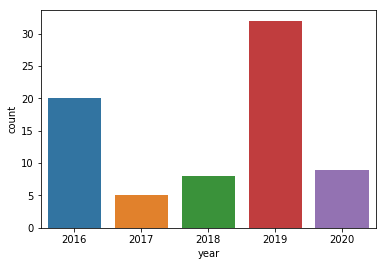

In [130]:
print("Total_trips ",completed_trips.status.count())
print(completed_trips.year.value_counts().sort_index(ascending = True))
sns.countplot(data=completed_trips, x='year',order=['2016','2017','2018','2019','2020']);

Out of the total 74 trips done in 5 years, maximum trips were in 2019 followed by 2016

# Total trips that were completed or cancelled


Total trips:  128
COMPLETED          57.8
CANCELED           39.8
DRIVER_CANCELED     2.3
Name: status, dtype: float64


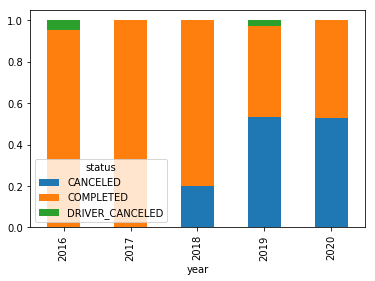

In [129]:
print('Total trips: ', data.status.count())
print(round(data.status.value_counts()/data.status.size*100,1))

data.groupby(by=['year'])['status'].value_counts(normalize=True).unstack('status').plot.bar(stacked=True);

57% trips were completed and no trip was cancelled in the year 2016-17

# Product type mostly chosen for travelling


          Total Trips     %
UberGo             41  55.4
UberAuto           18  24.3
Premier             9  12.2
Pool                6   8.1


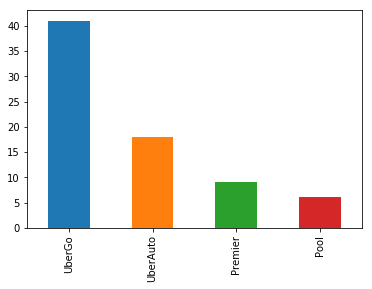

In [131]:
pt_trips = pd.Series(completed_trips.product_type.value_counts().sort_index(ascending=False))
# Transforming serie in dataframe
df = pd.DataFrame(pt_trips)
# Including new column with trips portion
df['%'] = (completed_trips.product_type.value_counts().sort_index(ascending=False)/completed_trips.product_type.size*100).round(1)
#Renaming columns labels
df.rename(columns={'product_type':'Total Trips'}, inplace=True)
print(df)
# Plotting product types count
completed_trips['product_type'].value_counts().plot(kind='bar')

Mostly UberGo was chosen for travelling

# Average fare, distance, amount and time spent on rides

In [134]:
print('Average fare:', round(completed_trips.fare_amount.mean(),1),'INR')
print('Average distance:',round(completed_trips.distance_km.mean(),1),'km')
print('Average fare/km:',round(completed_trips.fare_amount.sum()/completed_trips.distance_km.sum(),1),'INR/km')
print('Average time spent on trips:',round(completed_trips.trip_duration.mean(),1),'minutes')
print('')
print('Total fare amount:', round(completed_trips.fare_amount.sum(),1),'INR')
print('Total distance:',round(completed_trips.distance_km.sum(),1),'km')
print('Total time spent on trips:',round(completed_trips.trip_duration.sum()/60,1),'hours')


Average fare: 210.8 INR
Average distance: 11.2 km
Average fare/km: 18.8 INR/km
Average time spent on trips: 23.8 minutes

Total fare amount: 15602.7 INR
Total distance: 830.1 km
Total time spent on trips: 29.3 hours


# Weekdays having the highest average fares per km ridden

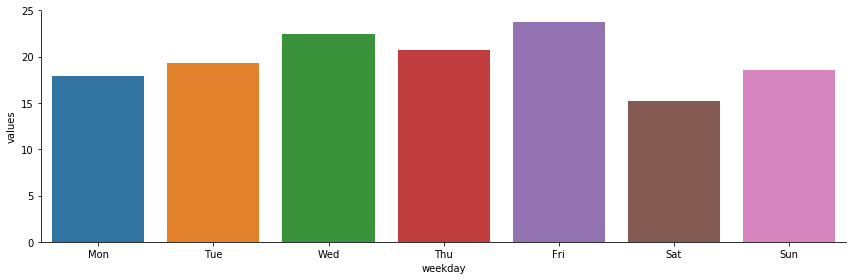

In [135]:
weekday_amt_km = round((completed_trips.groupby('weekday')['fare_amount'].sum()/completed_trips.groupby('weekday')['distance_km'].sum()),2)                                                                                                                              
amt_km_df = pd.DataFrame(weekday_amt_km)

amt_km_df = amt_km_df.reset_index()
amt_km_df.rename(columns={'weekday':'weekday',0:'values'},inplace=True)

sns.catplot(x='weekday', y='values', data=amt_km_df, kind='bar', height=4, aspect=3, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);

Friday has the highest average fare per km.Hence, it can be because it is followed by weekend,in IT sector many people tend to go out more inn Friday evening leading to more fare during that day

# Identify longest/shortest and more expensive/cheaper ride

In [136]:
trips_distance = completed_trips[completed_trips.distance_km==completed_trips.distance_km.max()]
trips_distance = trips_distance.append(completed_trips[completed_trips.distance_km==completed_trips.distance_km.min()])
trips_distance

,City,product_type,status,request_time,trip_time,trip_lat,trip_lng,trip_address,drop_time,drop_lat,...,distance_miles,fare_amount,distance_km,amount_km,trip_duration,request_lead_time,year,month,weekday,time
40,130,UberGo,COMPLETED,2019-11-03 07:27:52,2019-11-03 07:28:57,13.198351,77.709429,Uber Zone,2019-11-03 08:44:24,12.960398,...,28.97,799.88,46.62,17.16,75.5,1.1,2019,Nov,Sun,07:27
9,130,UberAuto,COMPLETED,2020-01-26 08:02:21,2020-01-26 08:07:55,12.907765,77.595132,"722, 8th Main Rd, Dollar Layout, 3rd Phase, J....",2020-01-26 08:10:20,12.901359,...,0.45,39.00,0.72,54.17,2.4,5.6,2020,Jan,Sun,08:02


In [139]:
rides_amount_km = completed_trips[completed_trips.amount_km==completed_trips.amount_km.max()]
rides_amount_km = rides_amount_km.append(completed_trips[completed_trips.amount_km==completed_trips.amount_km.min()])
rides_amount_km

,City,product_type,status,request_time,trip_time,trip_lat,trip_lng,trip_address,drop_time,drop_lat,...,distance_miles,fare_amount,distance_km,amount_km,trip_duration,request_lead_time,year,month,weekday,time
151,473,UberGo,COMPLETED,2016-07-14 04:34:58,2016-07-14 04:39:55,30.711709,76.768197,"1239, Sector 33C, Sector 33, Chandigarh, Chand...",2016-07-14 04:44:20,30.720750,...,0.99,96.00,1.59,60.38,4.4,5.0,2016,Jul,Thu,04:34
56,769,UberAuto,COMPLETED,2019-10-19 14:54:43,2019-10-19 14:58:00,12.281667,76.642963,"622, 19th Cross Rd, Industrial Suburb, Vidyara...",2019-10-19 15:12:49,12.311263,...,2.85,36.75,4.59,8.01,14.8,3.3,2019,Oct,Sat,14:54


# Average lead time before begining a trip

In [137]:
print(round(completed_trips.request_lead_time.mean(),1),'minutes')

7.9 minutes


# Maximum Dropoffs

In [149]:
import folium
from folium import plugins

coord=[]
for lat,lng in zip(completed_trips.drop_lat.values,completed_trips.drop_lng.values):
    coord.append([lat,lng])

map = folium.Map(
    location=[20.5937,78.9629],
    tiles='Stamen Terrain',
    #zoom_start=7,
    width='100%', 
    height='100%',
    control_scale=True)

map.add_child(plugins.HeatMap(coord))
        
map

Maximum dropoffs were in Bengaluru, followed by Hyderabad and so on depending on the length of stay in the area in a particular area